## √Årvores de regress√£o - exerc√≠cios 02

Este exerc√≠cio ser√° uma continua√ß√£o do anterior, mesma base, mesmas vari√°veis - vamos tentar buscar a 'melhor √°rvore'.


*Aten√ß√£o - Utilizar a base de dados em anexo que √© a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e n√£o deve ser utilizada*

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

In [19]:
imoveis_california = pd.read_csv('housing.csv')
imoveis_california.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

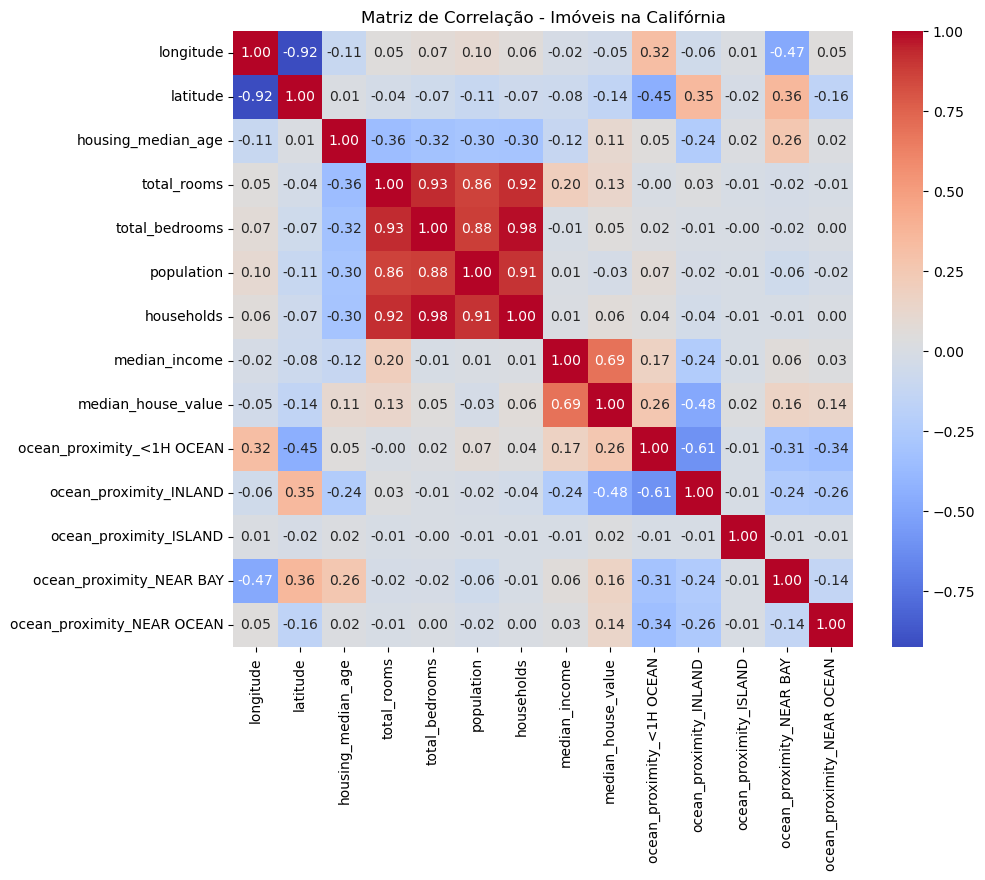

In [23]:
# Calcula a matriz de correla√ß√£o
correlacao = imoveis_california.corr(numeric_only=True)

# Plota o gr√°fico de correla√ß√£o
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correla√ß√£o - Im√≥veis na Calif√≥rnia")
plt.show()

### 1. Execute os passos do exerc√≠cio anterior, at√© que voc√™ tenha uma √°rvore de regress√£o predizendo o valor do im√≥vel na base de treinamento.

MSE na base de treinamento: 5195923312.68

Compara√ß√£o entre valor real e previsto (base de treino):
   Valor Real  Valor Previsto
0    227600.0   257871.693595
1    110400.0   129504.621461
2    248100.0   129504.621461
3    305600.0   155018.145588
4    214600.0   205833.626639


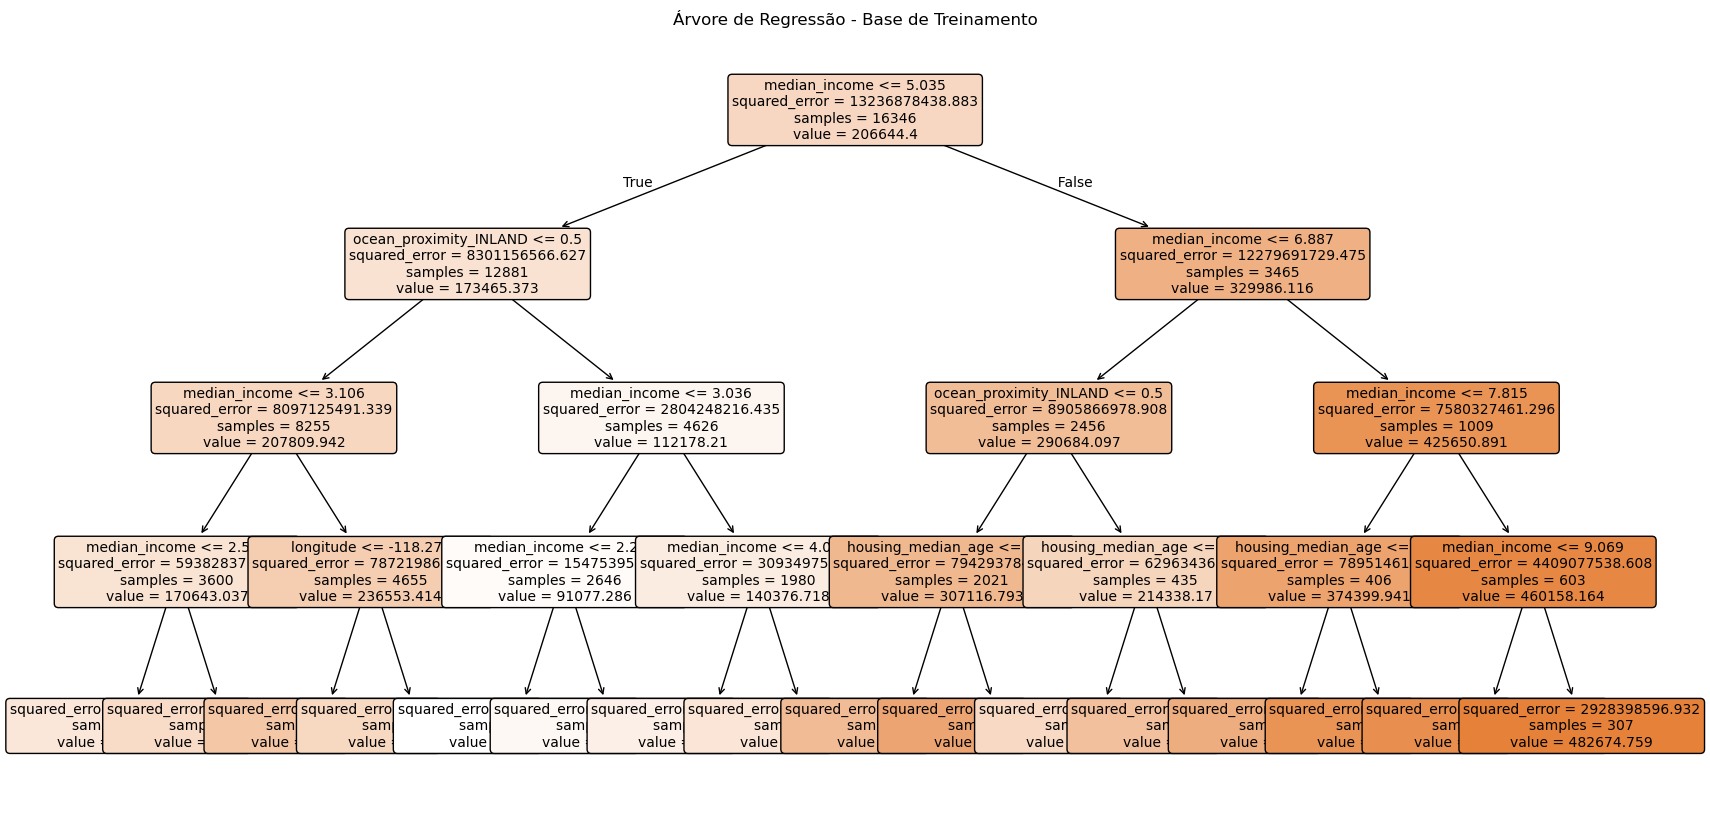

In [27]:

# Eliminar valores ausentes
imoveis_california.dropna(inplace=True)

# Transformar vari√°veis categ√≥ricas em vari√°veis dummies (One-hot encoding)
imoveis_california = pd.get_dummies(imoveis_california)

# Separar caracter√≠sticas (X) e alvo (y)
X = imoveis_california.drop('median_house_value', axis=1)
y = imoveis_california['median_house_value']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
arvore = DecisionTreeRegressor(max_depth=4, random_state=42)
arvore.fit(X_train, y_train)

# üîç Previs√µes usando a base de TREINAMENTO
previsoes_treino = arvore.predict(X_train)

# Avaliar o modelo na base de treinamento
mse_treino = mean_squared_error(y_train, previsoes_treino)
print(f"MSE na base de treinamento: {mse_treino:.2f}")

# Visualizar alguns resultados
resultado_treino = pd.DataFrame({
    'Valor Real': y_train.iloc[:5].values,
    'Valor Previsto': previsoes_treino[:5]
})
print("\nCompara√ß√£o entre valor real e previsto (base de treino):")
print(resultado_treino)

# Plot da √°rvore
plt.figure(figsize=(20, 10))
plot_tree(arvore, feature_names=X_train.columns, filled=True, rounded=True, fontsize=10)
plt.title("√Årvore de Regress√£o - Base de Treinamento")
plt.show()


In [29]:
# value medium 
print(f"Valor m√©dio previsto: {previsoes.mean():.2f}")

Valor m√©dio previsto: 206498.19


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa √°rvore.

In [31]:
caminho_poda = arvore.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = caminho_poda.ccp_alphas
impurezas = caminho_poda.impurities

### 3. Paca cada valor de alpha obtido no item 2, treine uma √°rvore com o respectivo alfa, e guarde essa √°rvore em uma lista.

In [53]:
arvores = []
for alpha in ccp_alphas:
    modelo = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    modelo.fit(X_train, y_train)
    arvores.append(modelo)

In [63]:
for i, alpha in enumerate(ccp_alphas[:5]):
    print(f"index {i} - ccp_alpha: {alpha}")

index 0 - ccp_alpha: 0.0
index 1 - ccp_alpha: 19398042.483295172
index 2 - ccp_alpha: 21320031.843810916
index 3 - ccp_alpha: 25797207.673919737
index 4 - ccp_alpha: 30117027.61334032


### 4. Para cada √°rvore na lista, calcule o MSE da √°rvore.

In [56]:
#Calcular o MSE de cada modelo na base de valida√ß√£o (teste)
mse_teste = [mean_squared_error(y_test, arvore.predict(X_test)) for arvore in arvores]
mse_treino = [mean_squared_error(y_train, arvore.predict(X_train)) for arvore in arvores]

### 5. Monte um gr√°fico do MSE pelo alpha, escolha um valor de alpha perto do ponto de m√≠nimo do MSE

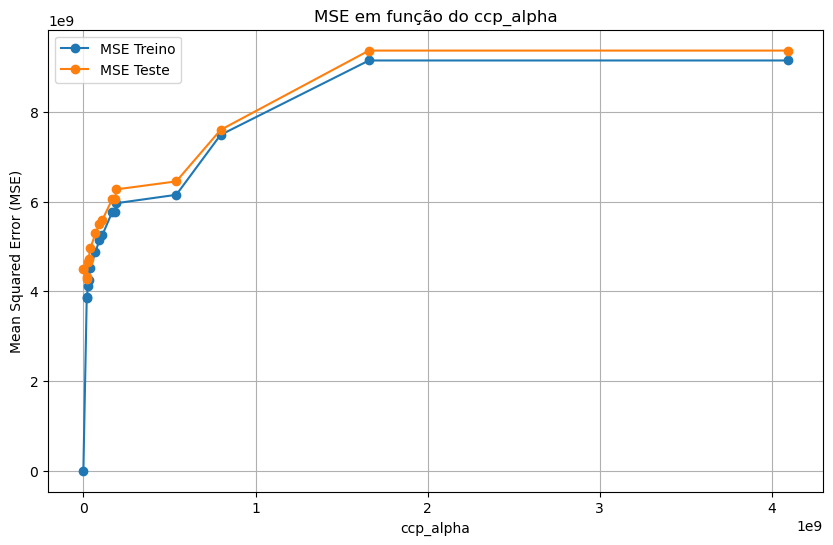

In [37]:
# Plotar o gr√°fico do MSE por alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, mse_treino, marker='o', label='MSE Treino')
plt.plot(ccp_alphas, mse_teste, marker='o', label='MSE Teste')
plt.xlabel("ccp_alpha")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE em fun√ß√£o do ccp_alpha")
plt.legend()
plt.grid(True)
plt.show()


### 6. Calcule o R-quadrado dessa √°rvore encontrada no item acima

In [41]:
# R¬≤ na base de treino
r2_treino = arvore.score(X_train, y_train)
print(f"R¬≤ na base de treino: {r2_treino:.4f}")

# R¬≤ na base de teste
r2_teste = arvore.score(X_test, y_test)
print(f"R¬≤ na base de teste: {r2_teste:.4f}")


R¬≤ na base de treino: 0.6075
R¬≤ na base de teste: 0.5978


### 7. Visualize esta √°rvore.

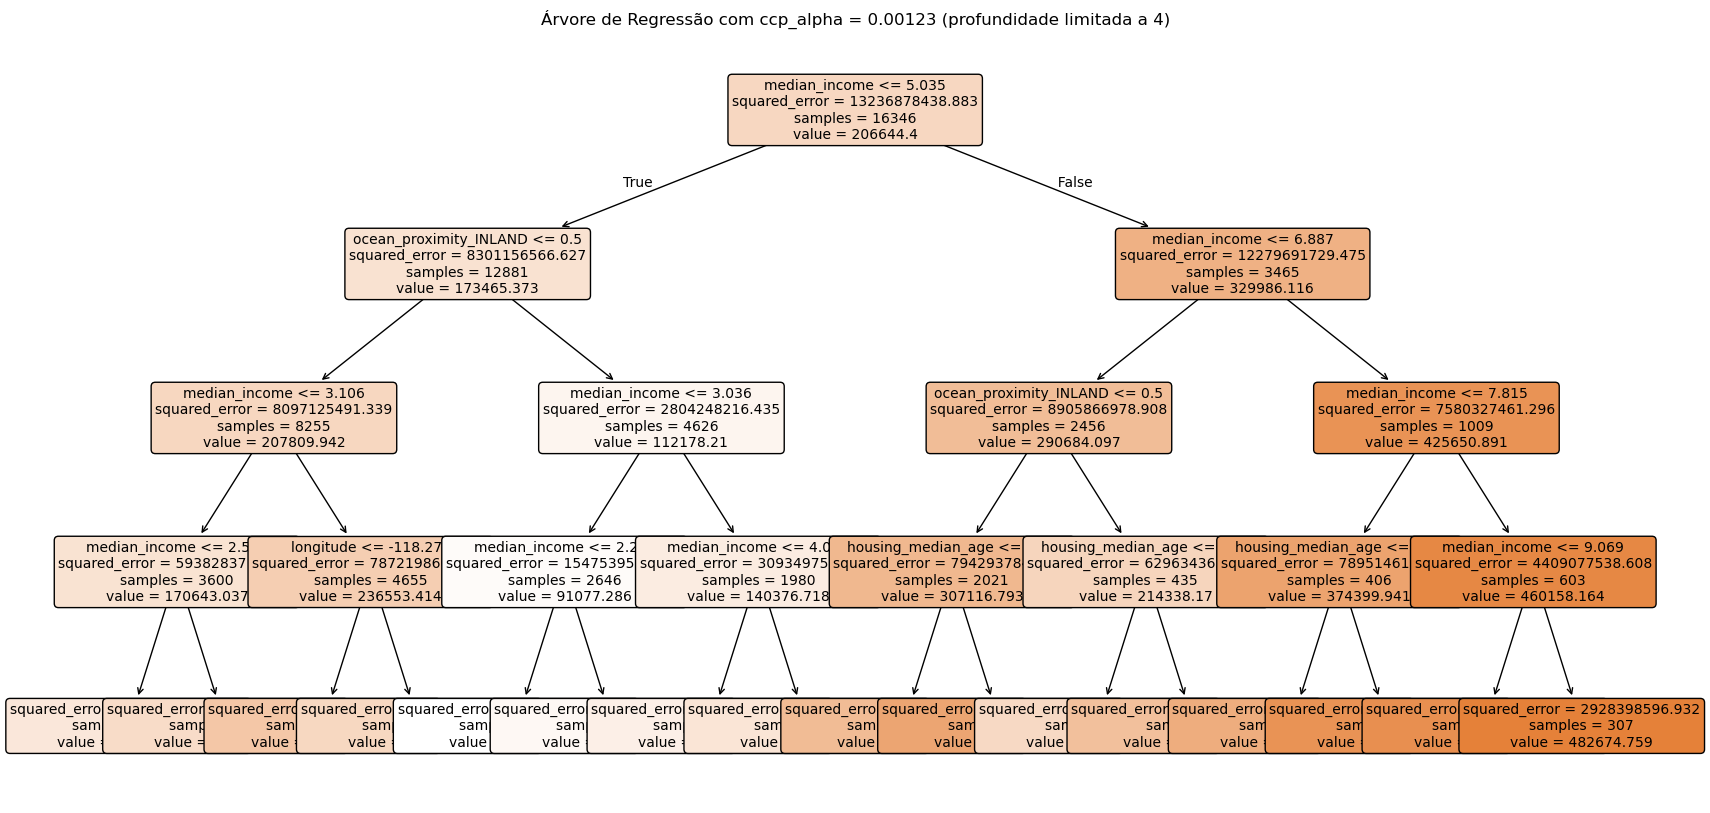

In [59]:
alpha_escolhido = 0.00123  # substitua com o alpha correto

plt.figure(figsize=(20, 10))
plot_tree(arvore,
          feature_names=X_train.columns,
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=4)
plt.title(f"√Årvore de Regress√£o com ccp_alpha = {alpha_escolhido:.5f} (profundidade limitada a 4)")
plt.show()